# Assignment: GDP Analysis

In [472]:
# importing packages
import pandas as pd
import numpy as np
from scipy.interpolate import spline
from numpy import array
import matplotlib as mpl
%matplotlib inline
# for plots
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.dates import date2num


# for date and time processing
import datetime

# for statistical graphs
import seaborn as sns

# Part-I: GDP Analysis of Indian States

In [473]:
#Reading part 1a Data set
State =  pd.read_csv (r"/Users/Divesh/Downloads/GDP_Analysis/Data 1-A/State-wise Gross Domestic Product (GDP) at current Price on yearly basis.csv")


In [474]:
#Data profiling  
State.head()
State.describe()
State.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
Items  Description           11 non-null object
Duration                     11 non-null object
Andhra Pradesh               11 non-null float64
Arunachal Pradesh            9 non-null float64
Assam                        9 non-null float64
Bihar                        9 non-null float64
Chhattisgarh                 11 non-null float64
Goa                          9 non-null float64
Gujarat                      9 non-null float64
Haryana                      11 non-null float64
Himachal Pradesh             7 non-null float64
Jammu & Kashmir              9 non-null float64
Jharkhand                    9 non-null float64
Karnataka                    9 non-null float64
Kerala                       9 non-null float64
Madhya Pradesh               11 non-null float64
Maharashtra                  7 non-null float64
Manipur                      7 non-null float64
Meghalaya                    

In [475]:
#Data Cleasning 

#Drop WB as it has no data
State.drop('West Bengal1',axis=1,inplace=True)


#Removing Union territoris 
State.drop('Chandigarh',axis=1,inplace=True)
State.drop('Delhi',axis=1,inplace=True)
State.drop('Andaman & Nicobar Islands',axis=1,inplace=True)
State.drop('Puducherry',axis=1,inplace=True)
#State.drop('All_India GDP',axis=1,inplace=True)

#Raw Data
State

#State.set_index('Duration')

#Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.
df_State = State.drop(State.index[[5,10]])


In [476]:
#Indexing to select required Df for Analysis
df_T = df_State.iloc[6: , 1:35]
df_GDPS = df_T.set_index('Duration')
df_GDPS = df_GDPS.transpose()

#fillNan with Mean value of its column mean value

df_GDPS["2015-16"].fillna(df_GDPS["2015-16"].mean(), inplace=True)
df_GDPS["2014-15"].fillna(df_GDPS["2014-15"].mean(), inplace=True)
df_GDPS["2013-14"].fillna(df_GDPS["2013-14"].mean(), inplace=True)

#calculating the mean value for 

df_GDPS['Mean']= df_GDPS.mean(axis=1)
df_GDPS.sort_values("Mean", ascending=False, inplace=True)

In [477]:
#Dropping All_India_GDP
df_GDPS_state = df_GDPS.drop(['All_India GDP'])
df_GDPS_state

Duration,2013-14,2014-15,2015-16,Mean
Mizoram,23.10,12.30,11.61381,15.671270
Tripura,18.14,15.92,11.61381,15.224603
Nagaland,21.98,10.85,11.61381,14.814603
Arunachal Pradesh,16.38,14.79,12.07000,14.413333
Karnataka,18.24,12.70,11.42000,14.120000
Andhra Pradesh,12.85,13.40,15.85000,14.033333
Chhattisgarh,16.44,13.69,10.98000,13.703333
Manipur,17.83,11.39,11.61381,13.611270
Bihar,12.30,17.92,10.59000,13.603333
Telangana,12.63,13.05,12.61000,12.763333


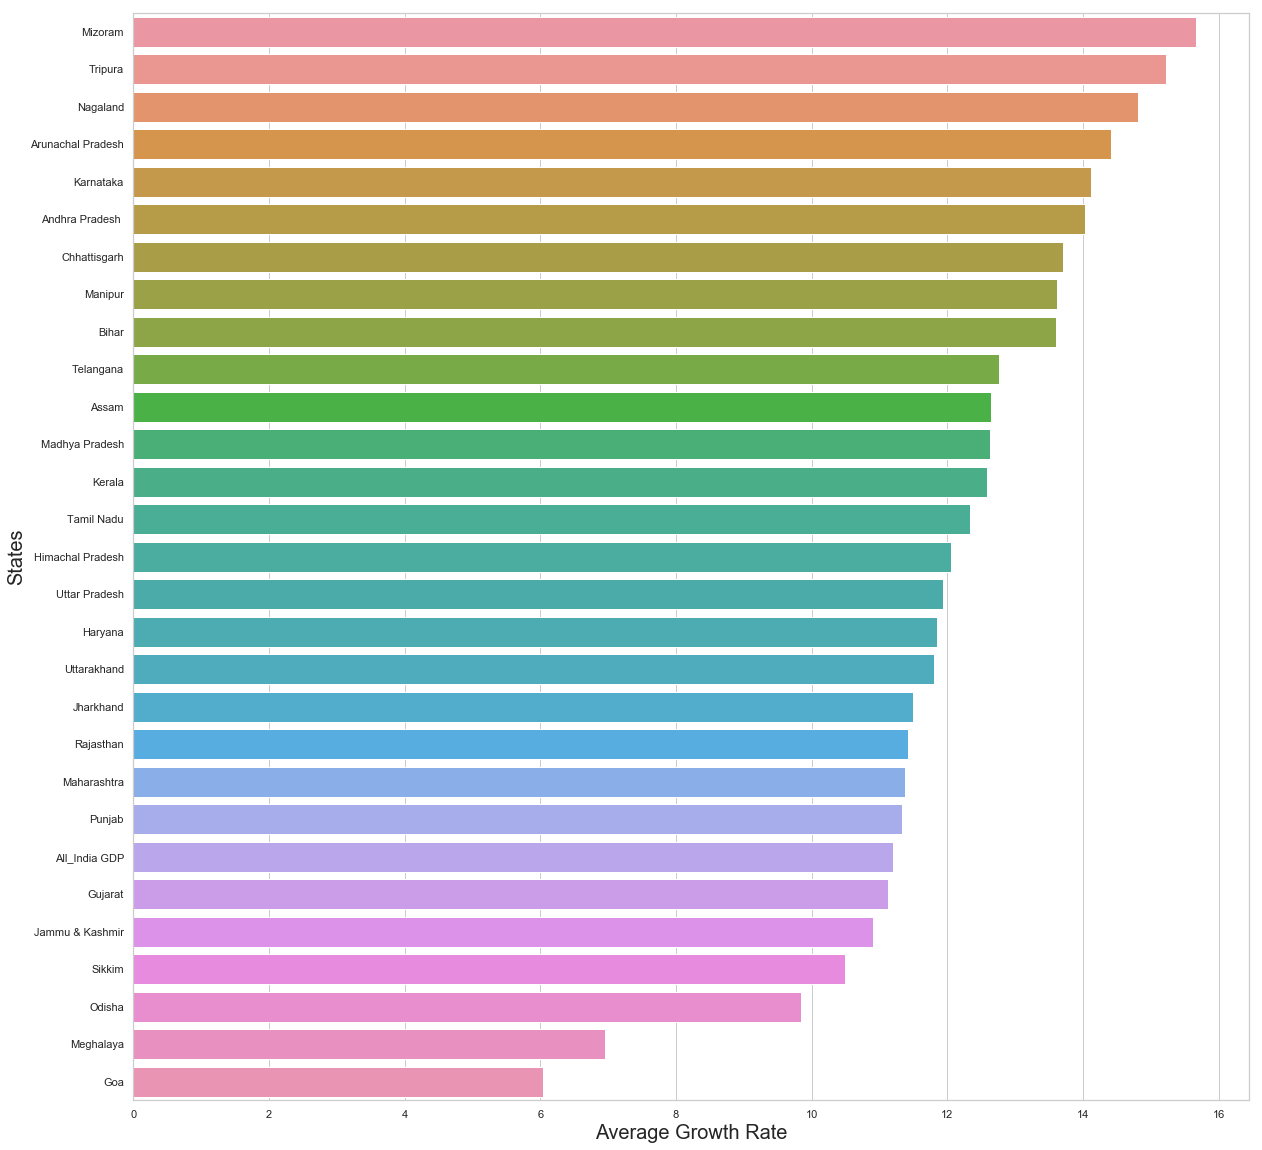

In [478]:
#Plotting the Avg growth of states over the duration 2013-14, 2014-15 

plt.figure(figsize=(20,20))
sns.set(style="whitegrid")
sns.barplot(x='Mean',y=df_GDPS.index,data=df_GDPS)
plt.ylabel("States",fontsize = 20)
plt.xlabel("Average Growth Rate",fontsize = 20)
plt.show()


#Which states have been growing consistently fast, and which ones have been struggling?
# Answer -- Mizoram is growing consistantly and Goa is strugliing 

In [479]:
#Selecting only GDP data for year 2015-16

df_15_16= df_State.iloc[4:5,1:]

df_ix = df_15_16.set_index('Duration')
df_GDPS_15_16= df_ix.transpose()
df_GDPS_15_16

#fillNan with Mean value of its column mean value

df_GDPS_15_16["2015-16"].fillna(df_GDPS_15_16["2015-16"].mean(), inplace=True)

#calculating the mean value for 

#df_GDPS_15_16['Total']= df_GDPS_15_16.T(axis=1)
df_GDPS_15_16.sort_values("2015-16", ascending=False, inplace=True)

#Dropping All_India_GDP
df_GDPS_b = df_GDPS_15_16.drop(['All_India GDP'])
#df_GDPS_b

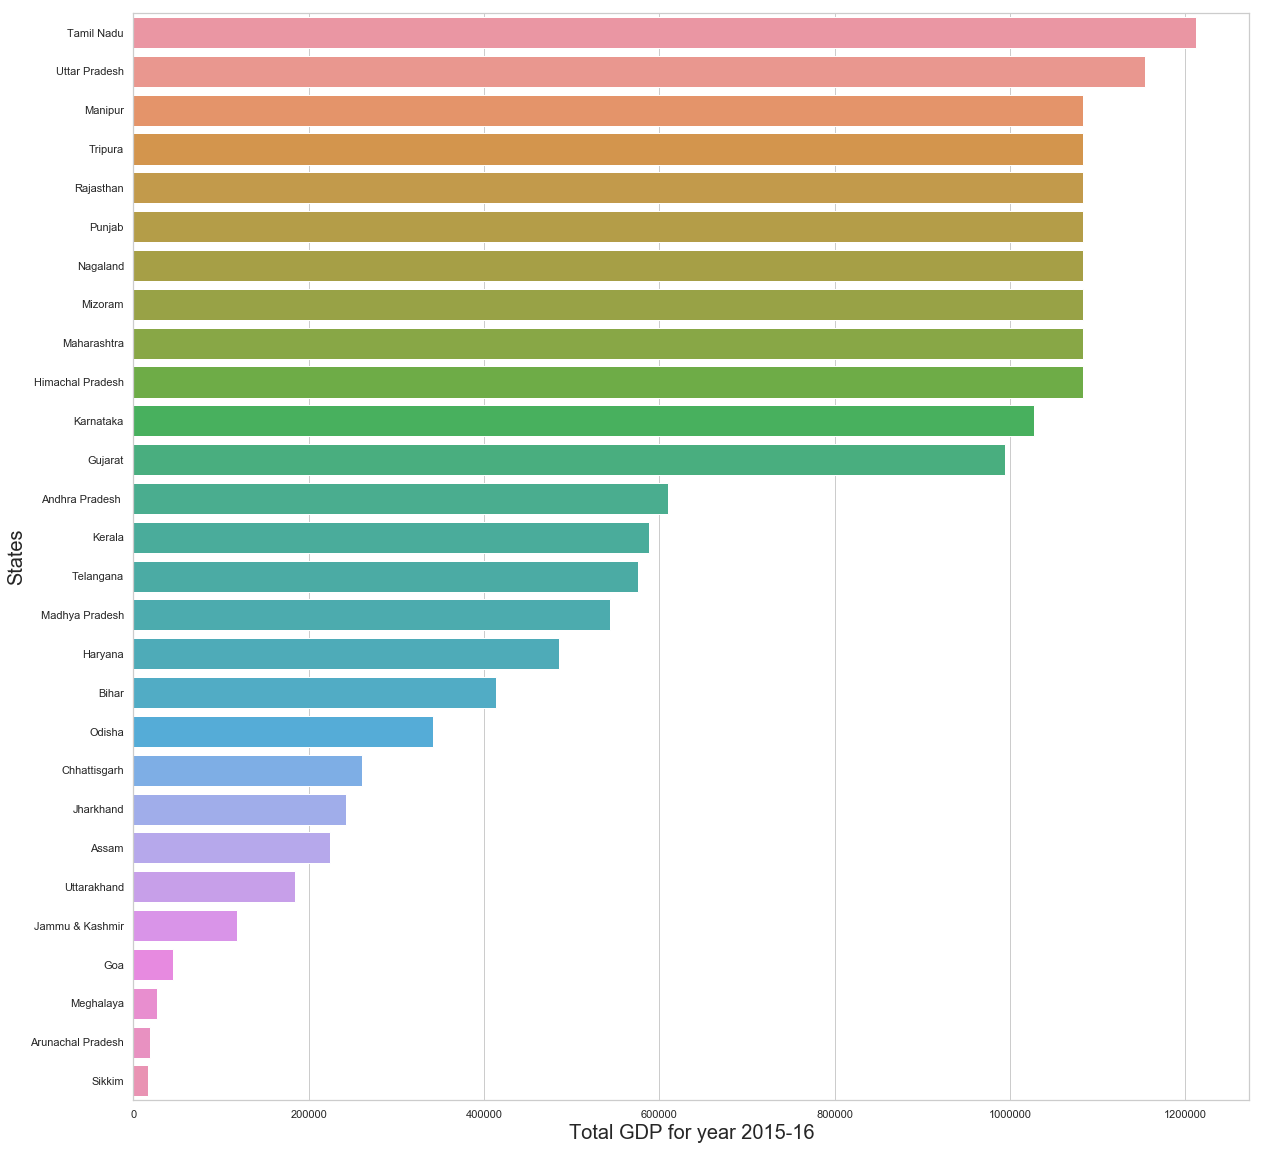

In [480]:
#Plot the total GDP of the states for the year 2015-16:

plt.figure(figsize=(20,20))
sns.set(style="whitegrid")
sns.barplot(x="2015-16",y=df_GDPS_b.index,data=df_GDPS_b)
plt.ylabel("States",fontsize = 20)
plt.xlabel("Total GDP for year 2015-16",fontsize = 20)
plt.show()


# Part 1-B Sector and Sub-sector contribution across State GDP

In [305]:
#Reading all the CSV file and merging it in combine file also adding new column as State by splitting the header.

import os
import glob
import pandas as pd
#set working directory
os.chdir("/Users/Divesh/Downloads/GDP_Analysis/Data 1-B")

#find all csv files in the folder
#use glob pattern matching -> extension = 'csv'
#save result in list -> all_filenames
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]


#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f, encoding = "ISO-8859-1").assign(State=os.path.basename(f).rsplit('-')[1]) for f in all_filenames ])
combined_csv.to_csv( "combined_csv.csv", index=False, encoding = "ISO-8859-1")


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [306]:
#Read the combine file
df_combined = pd.read_csv(("/Users/Divesh/Downloads/GDP_Analysis/Data 1-B/combined_csv.csv"),encoding = "ISO-8859-1")

In [ ]:
#Data profiling  
df_combined.describe()
df_combined.info()
df_combined.head()

In [412]:
#Data cleasning 
   # Removing Uniton teritorry 
df_UT=df_combined.loc[-df_combined['State'].isin(['Chandigarh','Puducherry','Delhi'])] 
df_UT

#Setting index 
df_1h = df_UT.set_index('State','Item')
df_1h = df_1h.drop(['2011-12','2012-13','2013-14','2015-16','2016-17','S.No.'], axis=1)
df_1h["2014-15"].fillna(df_1h["2014-15"].mean(), inplace=True)


# Base Data to be used for opeation "df_combined_Final"

In [314]:
# Selecting the per capita data to plot and sort based on it

df_final = df_1h.loc[df_1h['Item']=='Per Capita GSDP (Rs.)', :] 
df_final.sort_values("2014-15", ascending=False, inplace=True)
df_final

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,2014-15,Item
State,,
Goa,271793.0,Per Capita GSDP (Rs.)
Haryana,164077.0,Per Capita GSDP (Rs.)
Kerala,154778.0,Per Capita GSDP (Rs.)
Uttarakhand,153076.0,Per Capita GSDP (Rs.)
Maharashtra,152853.0,Per Capita GSDP (Rs.)
Himachal_Pradesh,147330.0,Per Capita GSDP (Rs.)
Tamil_Nadu,146503.0,Per Capita GSDP (Rs.)
Karnataka,145141.0,Per Capita GSDP (Rs.)
Gujarat,141263.0,Per Capita GSDP (Rs.)


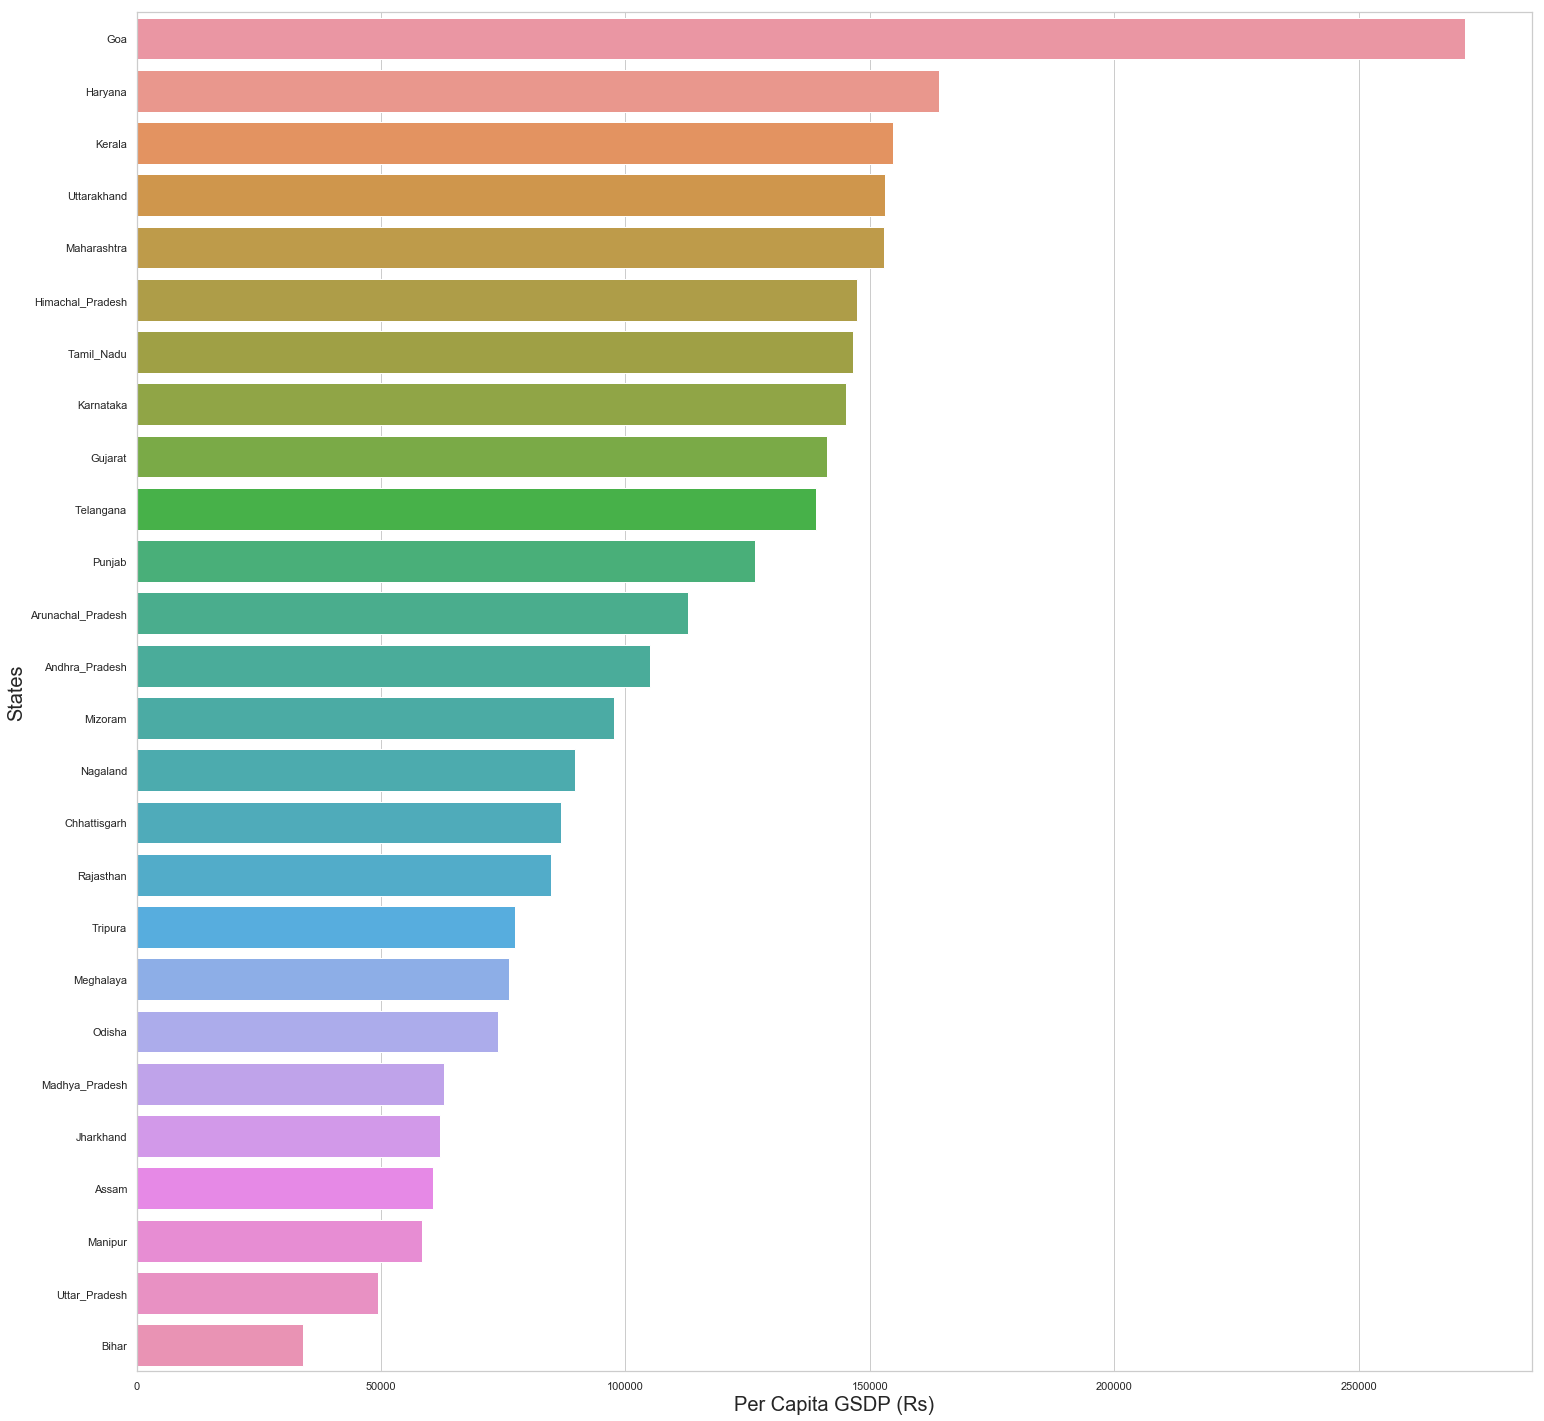

In [316]:
#Plot the GDP per capita for all the states.
#Identify the top-5 and the bottom-5 states based on GDP per capita.
#Find the ratio of highest per capita GDP to the lowest per capita GDP. --Gdp of Goa / Gdp of Bihar which is 8:1

plt.figure(figsize=(25,25))
sns.set(style="whitegrid")
sns.barplot(x='2014-15',y=df_final.index,data=df_final)
plt.ylabel("States",fontsize = 20)
plt.xlabel("Per Capita GSDP (Rs)",fontsize = 20)
plt.show()

# percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP for all the states.

In [340]:
#Selecting only required data
df_tmp=df_1h.loc[df_1h['Item'].isin(['Gross State Domestic Product','Primary','Secondary', 'Tertiary'])]

#Pivot
df_tmp1 = pd.pivot_table(df_tmp, index = ["Item"] , columns = ["State"], values=["2014-15"],aggfunc=np.sum)
df_pct = df_tmp1.transpose()

#Add perecentage 
df_pct['primary_percent'] = (df_pct['Primary'] / df_pct['Gross State Domestic Product'])*100
df_pct['Secondary_percent'] = (df_pct['Secondary'] / df_pct['Gross State Domestic Product'])*100
df_pct['Tertiary_Percent']= (df_pct['Tertiary'] / df_pct['Gross State Domestic Product'])*100

#Drop addtional columns
df_pct.drop('Gross State Domestic Product',axis=1,inplace=True)
df_pct.drop('Primary',axis=1,inplace=True)
df_pct.drop('Secondary',axis=1,inplace=True)
df_pct.drop('Tertiary',axis=1,inplace=True)

<Figure size 1920x800 with 0 Axes>

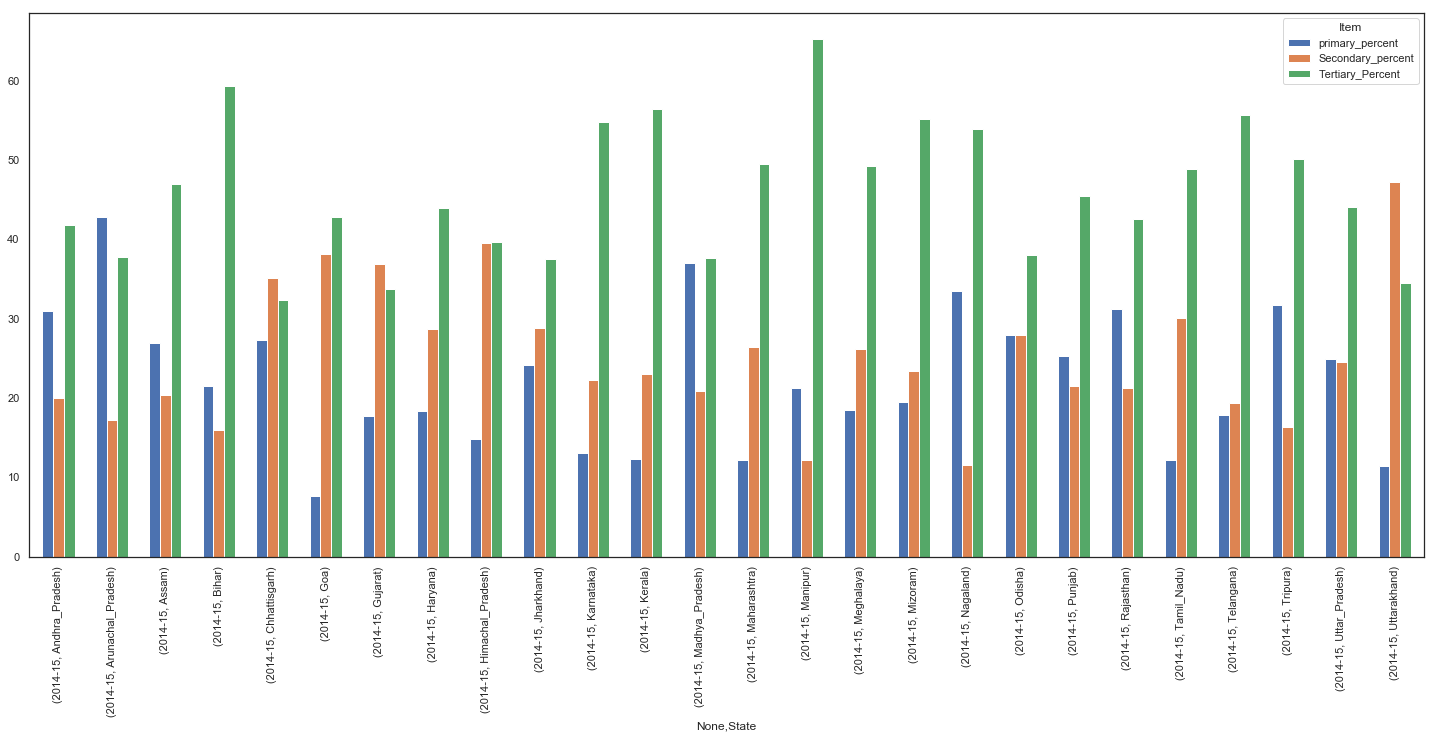

In [361]:
#Plot the percentage contribution of primary, secondary and 
#tertiary sectors as a percentage of total GDP for all the states


#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (25, 10)})


plt.figure(num=None, figsize=(24,10),dpi=80, facecolor='w', edgecolor='k')

df_pct.plot(kind='bar', stacked=False, width= 0.6) 

plt.show()



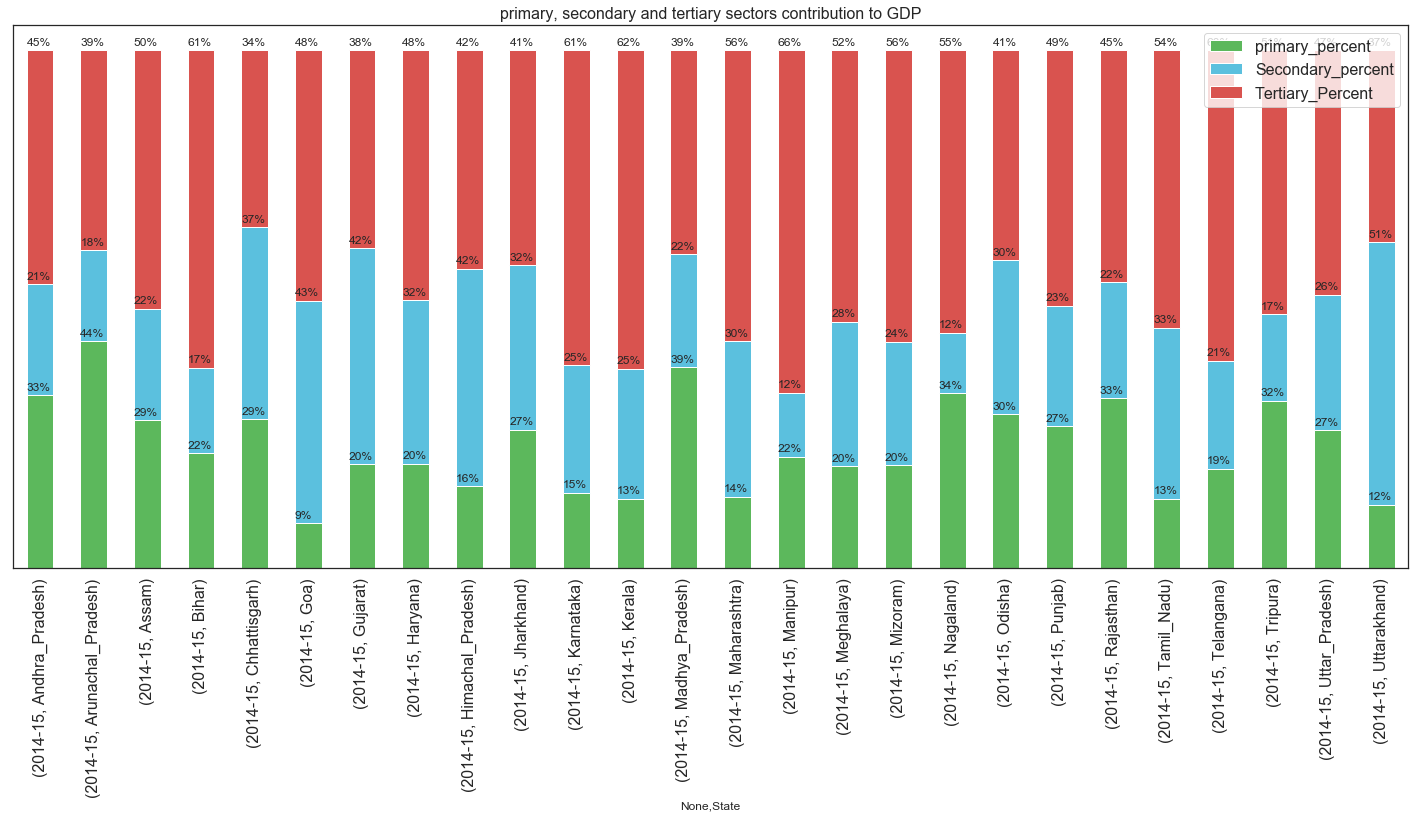

In [403]:
#plt.legend()
colors_list = ['#5cb85c','#5bc0de','#d9534f']

ax = (df_pct.div(df_pct.sum(1), axis=0)).plot(kind='bar',stacked=True,figsize=(25,10),width = 0.5,color = colors_list,edgecolor=None)
plt.legend(labels=df_pct.columns,fontsize= 16, loc=0)
plt.title("primary, secondary and tertiary sectors contribution to GDP",fontsize= 16)

plt.xticks(fontsize=16)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

   


In [413]:
#Adding qurtile based on per capita 
df_1h['Category'] = pd.qcut(df_1h[df_1h.Item =='Per Capita GSDP (Rs.)'][df_1h.columns[0]], [0, 0.20,0.5, 0.85, 1], labels=["C4", "C3", "C2", "C1"])



In [418]:
# Removing Sector , sub sub sectort and other unwated columns
df_cat_tmp=df_1h.loc[~df_1h['Item'].isin(['Per Capita GSDP (Rs.)', "Population ('00)", 'Total GSVA', 'Taxes', 'Subsidies' ,'Primary','Secondary', 'Tertiary','Crops','Livestock','Forestry and logging','Fishing and aquaculture','Trade & repair services', 'Hotels & restaurants', 'Railways', 'Road transport','Water transport','Air transport','Services incidental to transport','Storage','Communication & services related to broadcasting'])]


In [420]:
#reset index
df_cat = df_cat_tmp.reset_index()

In [422]:
#Spliting the categories to seprate df
df_C1 = df_cat.loc[df_cat['Category']=='C1'] 
df_C2 = df_cat.loc[df_cat['Category']=='C2']  
df_C3 = df_cat.loc[df_cat['Category']=='C3']  
df_C4 = df_cat.loc[df_cat['Category']=='C4']  

In [429]:
#Data transformation ( grouping by sub sector and summing up to there values ) for C1 Category dataset
df_cat_C1 = df_C1.groupby(['Item'])
df_cat_C1 = pd.DataFrame(df_cat_C1['2014-15'].sum())
df_cat_C1

# calculation there percentage contribution 
df_cat_C1['C1_Contribution'] = (df_cat_C1['2014-15'] / 116608273.0)*100

#dropping the addtiton columns
df_cat_C1.drop('Gross State Domestic Product',axis=0,inplace=True)
df_cat_C1.drop('TOTAL GSVA at basic prices',axis=0,inplace=True)
df_cat_C1.drop('Taxes on Products',axis=0,inplace=True)
df_cat_C1.drop('Subsidies on products',axis=0,inplace=True)
df_cat_C1.drop('Other services',axis=0,inplace=True)



# Sorting the values 
df_cat_C1.sort_values("C1_Contribution", ascending=False,inplace=True)


##Cumulative calculation to select sub sectore whose contribution is approx 80 % to total GDP 
df_cat_C1['cumulative'] = df_cat_C1['C1_Contribution'].cumsum()
df_cat_C1 =df_cat_C1.loc[(df_cat_C1.cumulative <= 81)]
df_cat_C1.reset_index(inplace= True)
df_cat_C1

,Item,2014-15,C1_Contribution,cumulative
0,Manufacturing,19074348.0,16.357628,16.357628
1,"Agriculture, forestry and fishing",15855785.0,13.597479,29.955107
2,"Trade, repair, hotels and restaurants",15667697.0,13.436180,43.391287
3,"Real estate, ownership of dwelling & professio...",15496222.0,13.289127,56.680414
4,Construction,12525126.0,10.741198,67.421613
5,"Transport, storage, communication & services r...",7837906.0,6.721569,74.143182
6,Trade & repair services*,7763847.0,6.658058,80.801240


In [430]:
#Data transformation ( grouping by sub sector and summing up to there values ) for C2 category 
df_cat_C2 = df_C2.groupby(['Item'])
df_cat_C2 = pd.DataFrame(df_cat_C2['2014-15'].sum())
df_cat_C2

# calculation there percentage contribution 
df_cat_C2['C2_Contribution'] = (df_cat_C2['2014-15'] / 6.228288e+08)*100

#dropping the addtiton columns
df_cat_C2.drop('Gross State Domestic Product',axis=0,inplace=True)
df_cat_C2.drop('TOTAL GSVA at basic prices',axis=0,inplace=True)
df_cat_C2.drop('Taxes on Products',axis=0,inplace=True)
df_cat_C2.drop('Subsidies on products',axis=0,inplace=True)
df_cat_C2.drop('Other services',axis=0,inplace=True)



# Sorting the values 
df_cat_C2.sort_values("C2_Contribution", ascending=False,inplace=True)


##Cumulative calculation to select sub sectore whose contribution is approx 80 % to total GDP 
df_cat_C2['cumulative'] = df_cat_C2['C2_Contribution'].cumsum()
df_cat_C2 =df_cat_C2.loc[(df_cat_C2.cumulative <= 81)]
df_cat_C2.reset_index(inplace= True)
df_cat_C2


,Item,2014-15,C2_Contribution,cumulative
0,Manufacturing,108002544.0,17.340647,17.340647
1,"Real estate, ownership of dwelling & professio...",95695548.0,15.364663,32.705310
2,"Agriculture, forestry and fishing",88427015.0,14.197644,46.902954
3,"Trade, repair, hotels and restaurants",63729156.0,10.232211,57.135165
4,Construction,43975718.0,7.060643,64.195808
5,Financial services,37812475.0,6.071086,70.266895
6,"Transport, storage, communication & services r...",37760099.0,6.062677,76.329572
7,Public administration,20189303.0,3.241549,79.571121


In [431]:
#Data transformation ( grouping by sub sector and summing up to there values ) for C2 category
df_cat_C3 = df_C3.groupby(['Item'])
df_cat_C3 = pd.DataFrame(df_cat_C3['2014-15'].sum())
df_cat_C3

# calculation there percentage contribution 
df_cat_C3['C3_Contribution'] = (df_cat_C3['2014-15'] /125319545)*100

#dropping the addtiton columns
df_cat_C3.drop('Gross State Domestic Product',axis=0,inplace=True)
df_cat_C3.drop('TOTAL GSVA at basic prices',axis=0,inplace=True)
df_cat_C3.drop('Taxes on Products',axis=0,inplace=True)
df_cat_C3.drop('Subsidies on products',axis=0,inplace=True)
df_cat_C3.drop('Other services',axis=0,inplace=True)



# Sorting the values 
df_cat_C3.sort_values("C3_Contribution", ascending=False,inplace=True)


##Cumulative calculation to select sub sectore whose contribution is approx 80 % to total GDP 
df_cat_C3['cumulative'] = df_cat_C3['C3_Contribution'].cumsum()
df_cat_C3 =df_cat_C3.loc[(df_cat_C3.cumulative <= 81)]
df_cat_C3.reset_index(inplace= True)
df_cat_C3


,Item,2014-15,C3_Contribution,cumulative
0,"Agriculture, forestry and fishing",27407472.0,21.870070,21.870070
1,Manufacturing,17366065.0,13.857427,35.727497
2,"Trade, repair, hotels and restaurants",13011909.0,10.382985,46.110482
3,"Real estate, ownership of dwelling & professio...",11818709.0,9.430859,55.541340
4,Construction,11043032.0,8.811899,64.353240
5,Mining and quarrying,9351471.0,7.462101,71.815341
6,"Transport, storage, communication & services r...",7154500.0,5.709006,77.524346


In [432]:
#Data transformation ( grouping by sub sector and summing up to there values ) for C4 categories 
df_cat_C4 = df_C4.groupby(['Item'])
df_cat_C4 = pd.DataFrame(df_cat_C4['2014-15'].sum())
df_cat_C4

# calculation there percentage contribution 
df_cat_C4['C4_Contribution'] = (df_cat_C4['2014-15'] /233252066)*100

#dropping the addtiton columns
df_cat_C4.drop('Gross State Domestic Product',axis=0,inplace=True)
df_cat_C4.drop('TOTAL GSVA at basic prices',axis=0,inplace=True)
df_cat_C4.drop('Taxes on Products',axis=0,inplace=True)
df_cat_C4.drop('Subsidies on products',axis=0,inplace=True)
df_cat_C4.drop('Other services',axis=0,inplace=True)



# Sorting the values 
df_cat_C4.sort_values("C4_Contribution", ascending=False,inplace=True)


##Cumulative calculation to select sub sectore whose contribution is approx 80 % to total GDP 
df_cat_C4['cumulative'] = df_cat_C4['C4_Contribution'].cumsum()
df_cat_C4 =df_cat_C4.loc[(df_cat_C4.cumulative <= 81)]
df_cat_C4.reset_index(inplace= True)
df_cat_C4


,Item,2014-15,C4_Contribution,cumulative
0,"Agriculture, forestry and fishing",56735044.0,24.323490,24.323490
1,"Trade, repair, hotels and restaurants",27484595.0,11.783216,36.106707
2,Manufacturing,24987032.0,10.712459,46.819166
3,"Real estate, ownership of dwelling & professio...",24177534.0,10.365410,57.184576
4,Construction,22775948.0,9.764521,66.949097
5,"Transport, storage, communication & services r...",16191800.0,6.941761,73.890858
6,Public administration,13486630.0,5.781998,79.672856


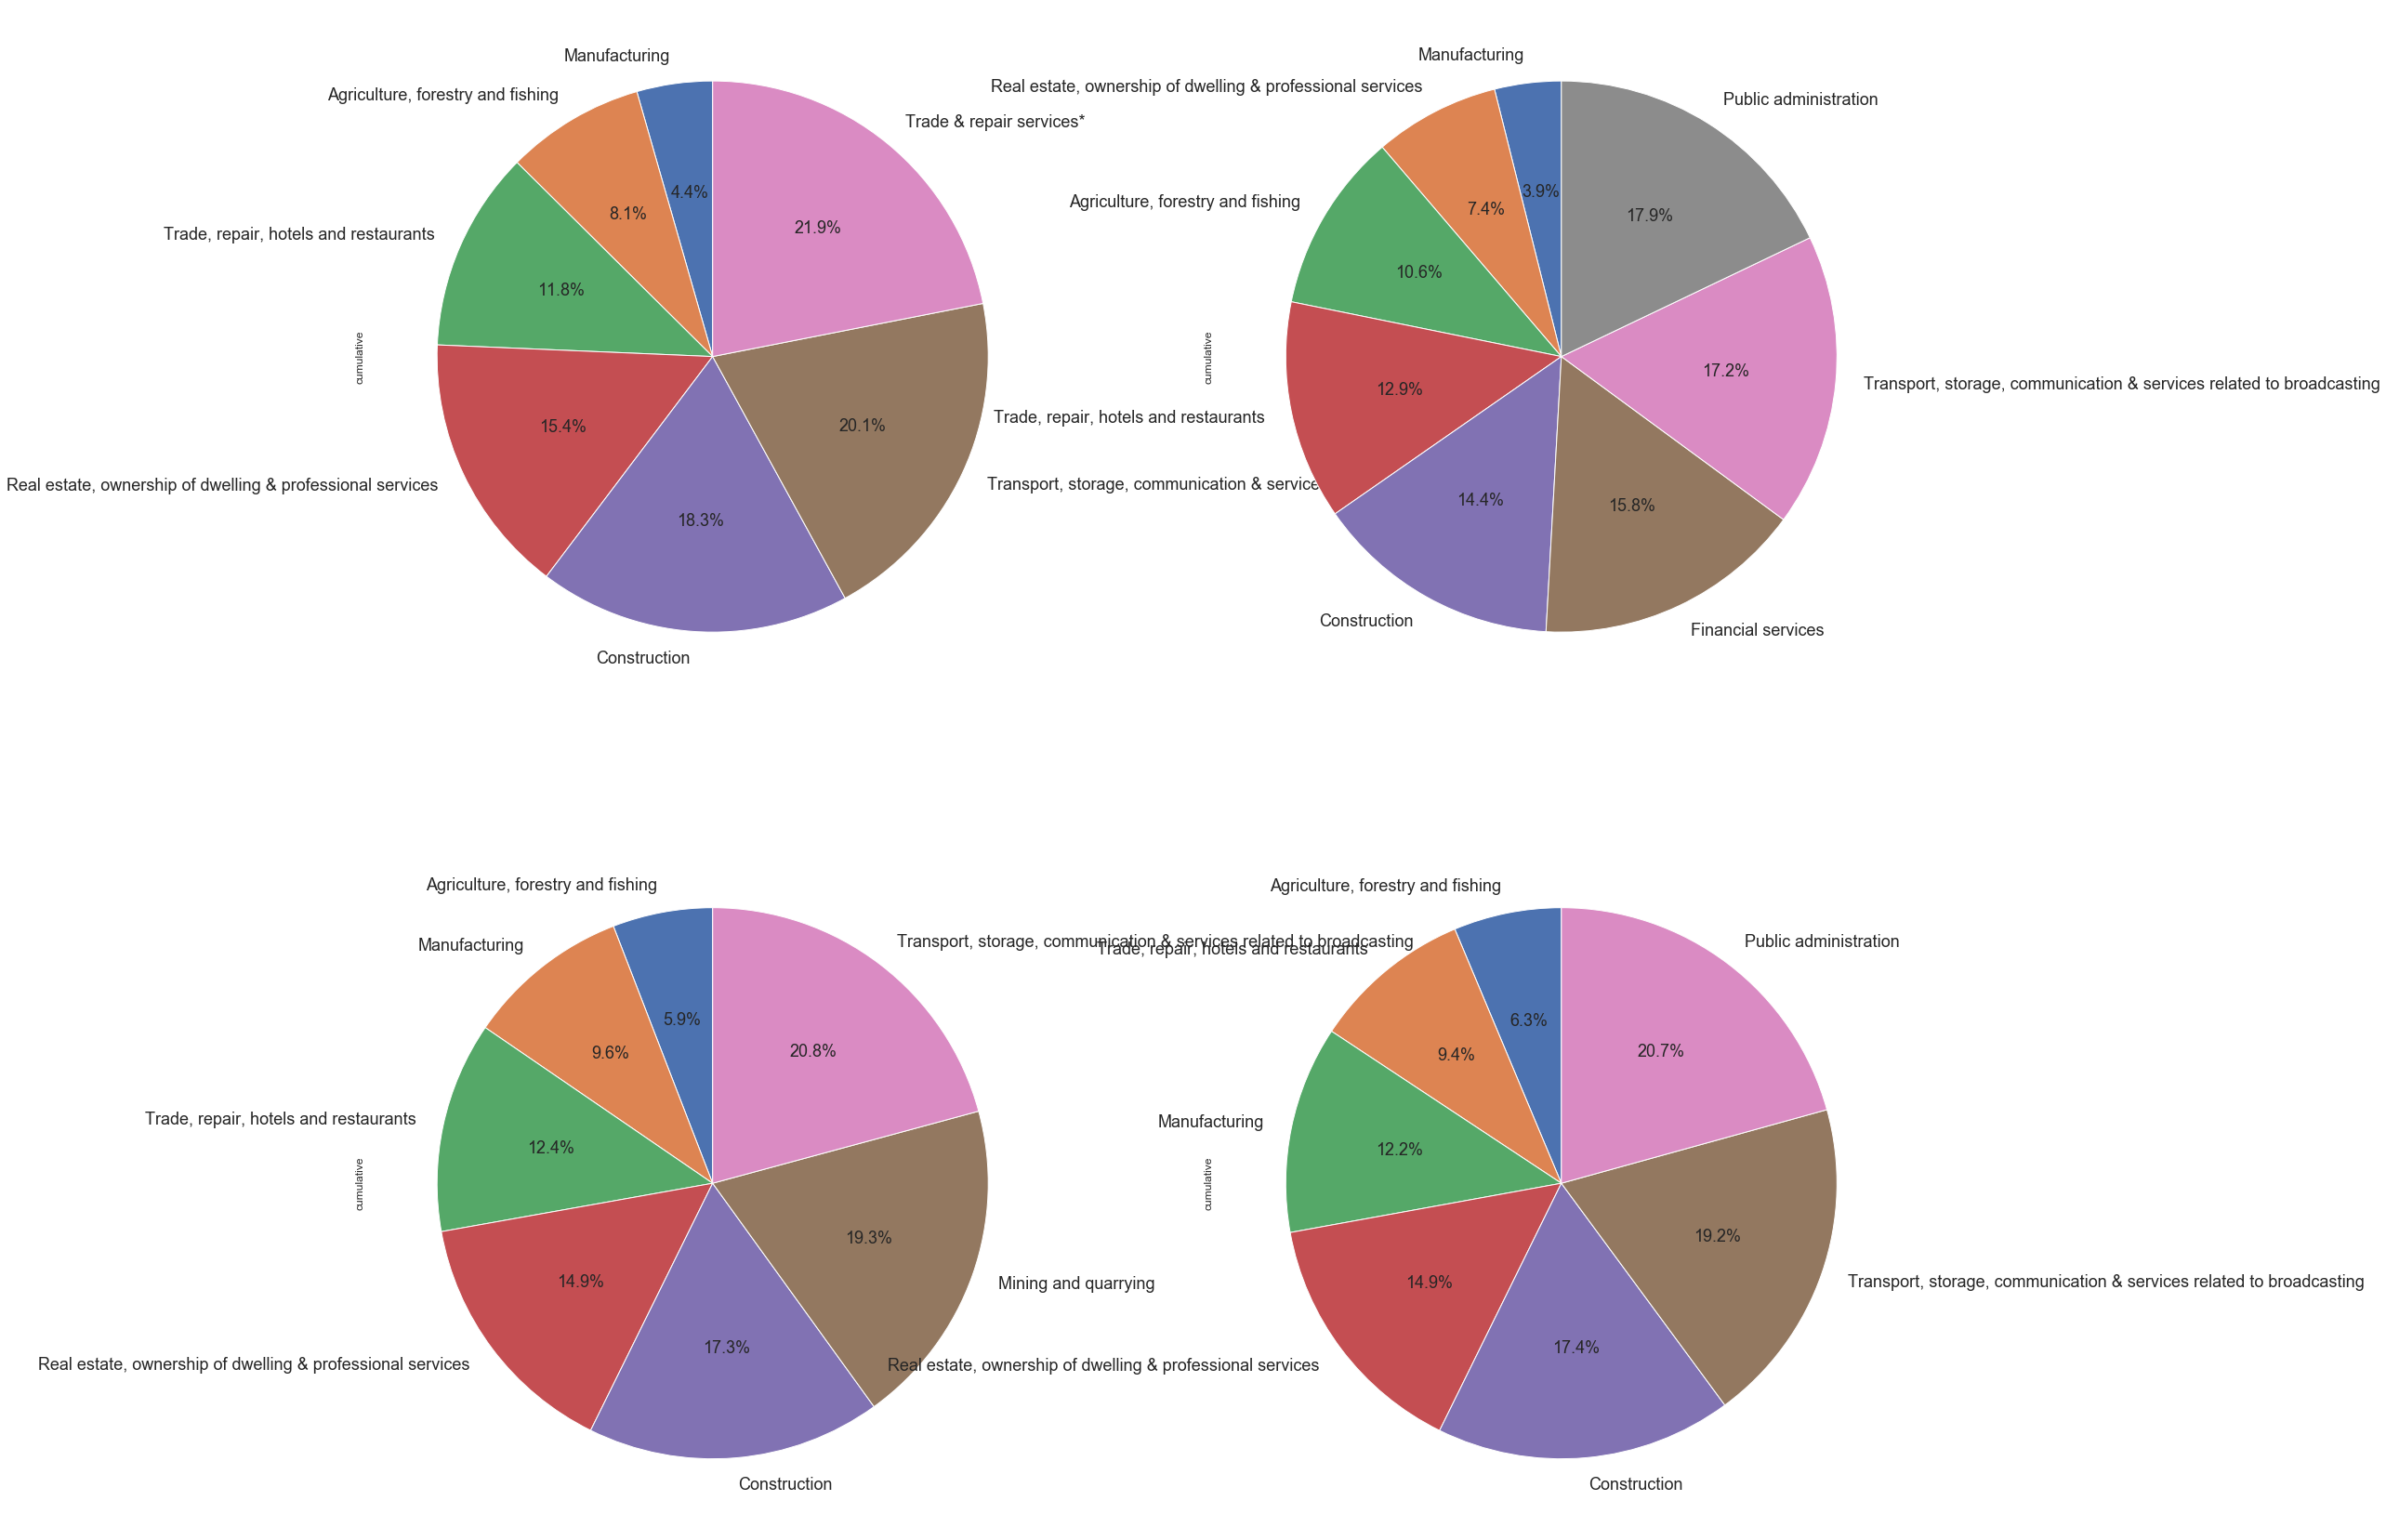

In [433]:
# Creates blank canvas
plt.figure(figsize=(30,30))


# plot chart C1
ax1 = plt.subplot(221, aspect='equal')
df_cat_C1.plot(kind='pie', y = 'cumulative', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_cat_C1['Item'], legend = False, fontsize=18)

# plot chart C2
ax2 = plt.subplot(222, aspect='equal')
df_cat_C2.plot(kind='pie', y = 'cumulative', ax=ax2, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_cat_C2['Item'], legend = False, fontsize=18)

# plot chart C3
ax3 = plt.subplot(223, aspect='equal')
df_cat_C3.plot(kind='pie', y = 'cumulative', ax=ax3, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_cat_C3['Item'], legend = False, fontsize=18)

# plot chart C4
ax4 = plt.subplot(224, aspect='equal')
df_cat_C4.plot(kind='pie', y = 'cumulative', ax=ax4, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_cat_C4['Item'], legend = False, fontsize=18)


plt.show()


# Part-II: GDP and Education Drop-out Rates

In [434]:
drop_out =  pd.read_csv (r"/Users/Divesh/Downloads/GDP_Analysis/Data 2/rs_session243_au570_1.1.csv")

In [447]:
drop_out
drop_out_1 = drop_out.drop(['Primary - 2012-2013','Primary - 2014-2015.1','Upper Primary - 2012-2013',
                            'Upper Primary - 2013-2014','Secondary - 2012-2013','Secondary - 2013-2014',
                            'Senior Secondary - 2012-2013','Senior Secondary - 2013-2014','Senior Secondary - 2014-2015','Sl. No.'], axis=1)

#drop_out_2 = drop_UT(['Chandigarh','Dadra & Nagar Haveli','Daman & Diu','Delhi','A & N Islands','Puducherry','Lakshadweep'], axis=1)

#removing all union territory 
drop_ut = drop_out_1.loc[~drop_out_1['Level of Education - State'].isin(['Chandigarh','Dadra & Nagar Haveli','Daman & Diu','Delhi','A & N Islands',
                                                                         'Puducherry','Lakshadweep'])]

drop_ut.reset_index(drop=True)
drop_ut1= drop_ut.set_index('Level of Education - State')

#Rename column name for better understanding .
drop_ut1.rename(columns={'Primary - 2014-2015': 'PrimaryDropOut', 'Upper Primary - 2014-2015': 'UpperPrimaryDropOut','Secondary - 2014-2015': 'SecondaryDropOut'}, inplace=True)
                
                
#joining the part 1B DF with part 2 data to compare per capita GSDP wrt to drop rates
df_join_1 = drop_ut1.join(df_final, how='inner', sort = False)
df_join = df_join_1.drop(['Item'], axis=1)

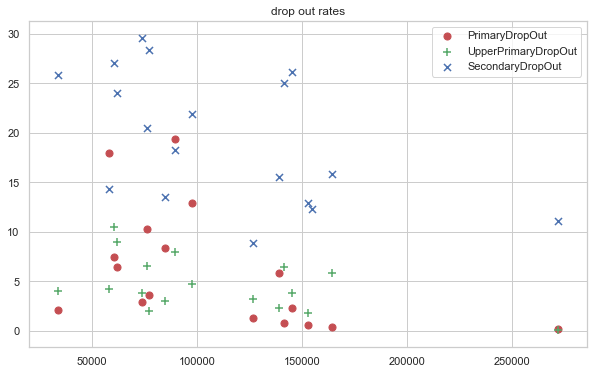

In [483]:
#Scatter plot to check the co-relation between PerCapita value and the drop out rates

plt.figure(figsize=(10,6))

p1= plt.scatter(x=df_join['2014-15'] , y=df_join['PrimaryDropOut'],s =50, c='r', marker='o')
p2= plt.scatter(x=df_join['2014-15'] , y=df_join['UpperPrimaryDropOut'],s =50, c='g', marker='+')
p3= plt.scatter(x=df_join['2014-15'] , y=df_join['SecondaryDropOut'],s =50,c='b', marker='x')
plt.title('drop out rates')
plt.legend(loc=0)


In [ ]:
#Primary drop out is more in low per capita state compare , the eduction drop out is less for state who has better per capita incom

# Good Job :)